In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import randint

# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

#Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

#Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Naive bayes
from sklearn.naive_bayes import GaussianNB 

#Stacking
from mlxtend.classifier import StackingClassifier

In [2]:
!pip install numpy

In [3]:
import numpy as np
print(np.__version__)


2.2.4


In [4]:
!pip install pandas matplotlib seaborn scipy scikit-learn mlxtend


In [5]:
# Data handling and plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical functions
from scipy import stats
from scipy.stats import randint

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Model evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

# Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

# Ensemble methods - Bagging & Boosting
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

# Naive Bayes
from sklearn.naive_bayes import GaussianNB 

# Stacking (needs mlxtend)
from mlxtend.classifier import StackingClassifier


In [6]:
import pandas as pd
df = pd.read_csv('survey.csv')

# Show the first 5 rows
print(df.head())


             Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1 

In [7]:
train_df = pd.read_csv('survey.csv')      # Loads your CSV into a DataFrame
print(train_df.shape)                     # Prints number of rows and columns (e.g., (1000, 10))
print(train_df.describe())                # Shows summary statistics for numeric columns
print(train_df.info())                    # Shows column types, non-null counts, and memory usage


(1259, 27)
                Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-n

In [8]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total   Percent
comments                    1095  0.869738
state                        515  0.409055
work_interfere               264  0.209690
self_employed                 18  0.014297
Gender                         0  0.000000
Timestamp                      0  0.000000
Age                            0  0.000000
family_history                 0  0.000000
treatment                      0  0.000000
no_employees                   0  0.000000
Country                        0  0.000000
remote_work                    0  0.000000
tech_company                   0  0.000000
care_options                   0  0.000000
benefits                       0  0.000000
seek_help                      0  0.000000
anonymity                      0  0.000000
leave                          0  0.000000
wellness_program               0  0.000000
mental_health_consequence      0  0.000000
phys_health_consequence        0  0.000000
supervisor                     0  0.000000
coworkers  

In [9]:
train_df.drop(['comments'], axis= 1, inplace=True)
train_df.drop(['state'], axis= 1, inplace=True)
train_df.drop(['Timestamp'], axis= 1, inplace=True)

train_df.isnull().sum().max() #just checking that there's no missing data missing...
train_df.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [10]:
train_df = pd.read_csv('survey.csv')


In [11]:
# Assign default values for each data type
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

# Create lists by data type
intFeatures = ['Age']
stringFeatures = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                  'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                  'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                  'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                  'seek_help']
floatFeatures = []  # You can add float feature names here if any

# Clean the NaN's
for feature in train_df.columns:
    if feature in intFeatures:
        train_df[feature] = train_df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        train_df[feature] = train_df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        train_df[feature] = train_df[feature].fillna(defaultFloat)
    else:
        print(f'Warning: Feature "{feature}" not recognized in any list.')

# Display the first few rows
train_df.head()


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [12]:
#Clean 'Gender'
gender = train_df['Gender'].unique()
print(gender)

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


In [13]:
# Make gender groups
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man", "msle", "mail", "malr", "cis man", "cis male", "Cis Male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary", "nah", "all", "enby", "fluid", "genderqueer", "androgyne", 
             "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]
female_str = ["cis female", "f", "female", "woman", "femake", "female ", "cis-female/femme", "female (cis)", "femail"]

# Convert Gender column to lowercase for comparison
train_df['Gender'] = train_df['Gender'].str.lower()

# Map gender categories
train_df.loc[train_df['Gender'].isin([g.lower() for g in male_str]), 'Gender'] = 'male'
train_df.loc[train_df['Gender'].isin([g.lower() for g in female_str]), 'Gender'] = 'female'
train_df.loc[train_df['Gender'].isin([g.lower() for g in trans_str]), 'Gender'] = 'trans'

# Remove unclear/invalid gender responses
invalid_genders = ['a little about you', 'p']
train_df = train_df[~train_df['Gender'].isin(invalid_genders)]

# Check unique values
print(train_df['Gender'].unique())


['female' 'male' 'trans']


In [14]:
# Fill missing age values with median (without using inplace)
median_age = train_df['Age'].median()
train_df['Age'] = train_df['Age'].fillna(median_age)

# Replace ages < 18 or > 120 with median
train_df.loc[train_df['Age'] < 18, 'Age'] = median_age
train_df.loc[train_df['Age'] > 120, 'Age'] = median_age

# Create age range bins
train_df['age_range'] = pd.cut(train_df['Age'], 
                               bins=[0, 20, 30, 65, 100], 
                               labels=["0-20", "21-30", "31-65", "66-100"], 
                               include_lowest=True)

# Optional: View result
print(train_df[['Age', 'age_range']].head())


   Age age_range
0   37     31-65
1   44     31-65
2   32     31-65
3   31     31-65
4   31     31-65


In [15]:
# Replace both actual NaNs and 'NaN' string with 'No' for self_employed column
train_df['self_employed'] = train_df['self_employed'].replace([np.nan, defaultString], 'No')

# Optional: check unique values
print(train_df['self_employed'].unique())


['No' 'Yes']


In [16]:
# There are only 0.20% missing in work_interfere, so let's change NaN to "Don't know"
# Replace both actual NaNs and 'NaN' string from defaultString
train_df['work_interfere'] = train_df['work_interfere'].replace([np.nan, defaultString], "Don't know")

# Check unique values
print(train_df['work_interfere'].unique())


['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


In [17]:
#Encoding data
labelDict = {}
for feature in train_df:
    le = preprocessing.LabelEncoder()
    le.fit(train_df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    train_df[feature] = le.transform(train_df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)

label_Timestamp ['2014-08-27 11:29:31', '2014-08-27 11:29:37', '2014-08-27 11:29:44', '2014-08-27 11:29:46', '2014-08-27 11:30:22', '2014-08-27 11:31:22', '2014-08-27 11:31:50', '2014-08-27 11:32:05', '2014-08-27 11:32:39', '2014-08-27 11:32:43', '2014-08-27 11:32:44', '2014-08-27 11:32:49', '2014-08-27 11:33:23', '2014-08-27 11:33:26', '2014-08-27 11:33:57', '2014-08-27 11:34:00', '2014-08-27 11:34:20', '2014-08-27 11:34:37', '2014-08-27 11:34:53', '2014-08-27 11:35:08', '2014-08-27 11:35:12', '2014-08-27 11:35:24', '2014-08-27 11:35:48', '2014-08-27 11:36:24', '2014-08-27 11:36:48', '2014-08-27 11:37:08', '2014-08-27 11:37:23', '2014-08-27 11:37:59', '2014-08-27 11:38:12', '2014-08-27 11:38:18', '2014-08-27 11:38:55', '2014-08-27 11:39:03', '2014-08-27 11:39:31', '2014-08-27 11:39:36', '2014-08-27 11:40:51', '2014-08-27 11:41:17', '2014-08-27 11:41:37', '2014-08-27 11:41:50', '2014-08-27 11:42:08', '2014-08-27 11:42:15', '2014-08-27 11:42:25', '2014-08-27 11:42:31', '2014-08-27 11:43

In [18]:
#Get rid of 'Country'
train_df = train_df.drop(['Country'], axis= 1)
train_df.head()

,Timestamp,Age,Gender,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,age_range
0,0,19,0,10,0,0,1,2,4,0,...,1,1,1,2,1,0,2,0,158,2
1,1,26,1,11,0,0,0,3,5,0,...,0,1,0,0,1,1,0,0,158,2
2,2,14,1,45,0,0,0,3,4,0,...,1,1,2,2,2,2,1,0,158,2
3,3,13,1,45,0,1,1,2,2,0,...,2,2,1,0,0,0,1,1,158,2
4,4,13,1,37,0,0,0,1,1,1,...,1,1,1,2,2,2,0,0,158,2


In [19]:
#missing data
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total  Percent
Timestamp                      0      0.0
Age                            0      0.0
Gender                         0      0.0
state                          0      0.0
self_employed                  0      0.0
family_history                 0      0.0
treatment                      0      0.0
work_interfere                 0      0.0
no_employees                   0      0.0
remote_work                    0      0.0
tech_company                   0      0.0
benefits                       0      0.0
care_options                   0      0.0
wellness_program               0      0.0
seek_help                      0      0.0
anonymity                      0      0.0
leave                          0      0.0
mental_health_consequence      0      0.0
phys_health_consequence        0      0.0
coworkers                      0      0.0
supervisor                     0      0.0
mental_health_interview        0      0.0
phys_health_interview          0  

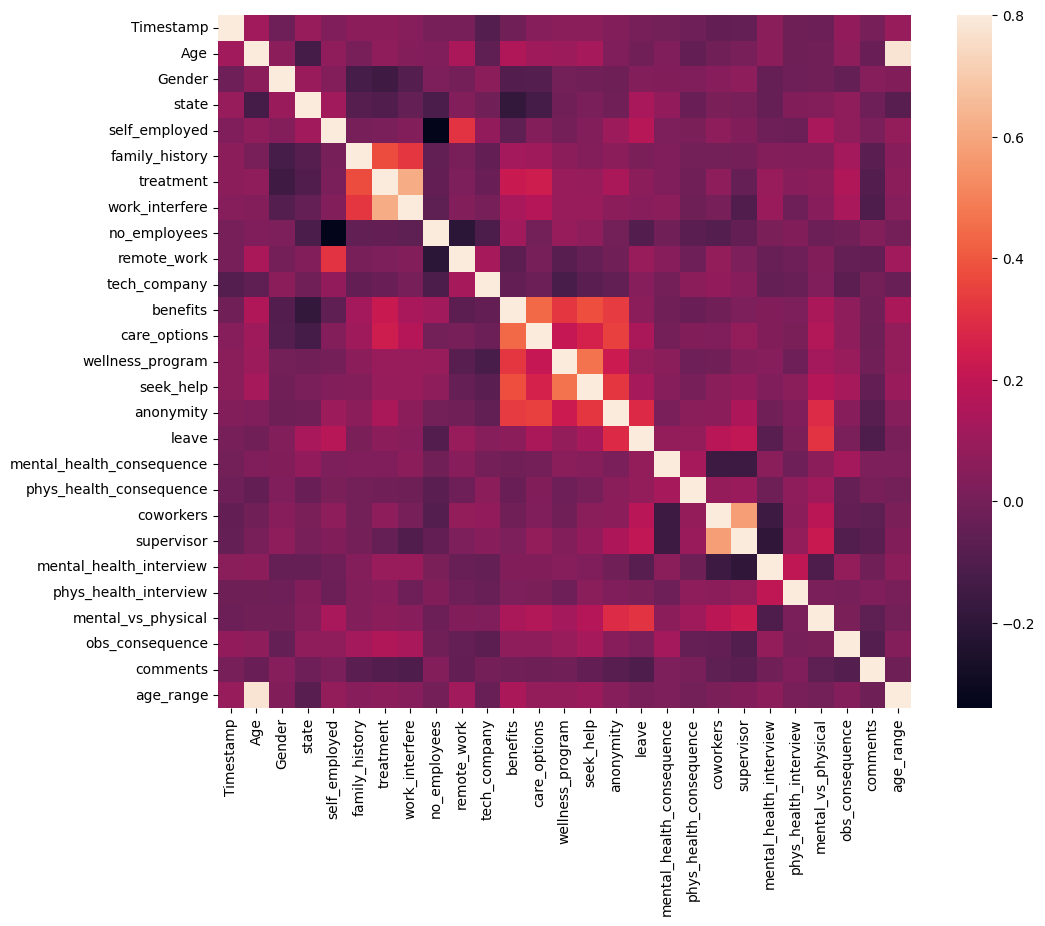

In [20]:
#correlation matrix
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

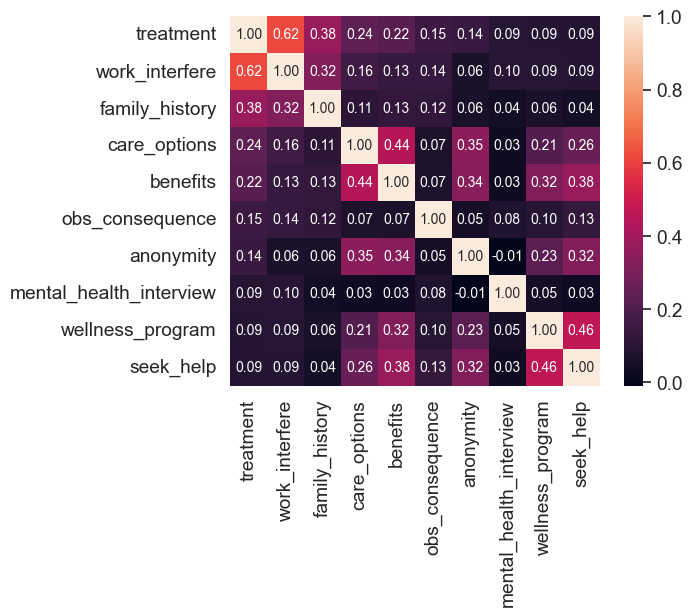

In [21]:
#treatment correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

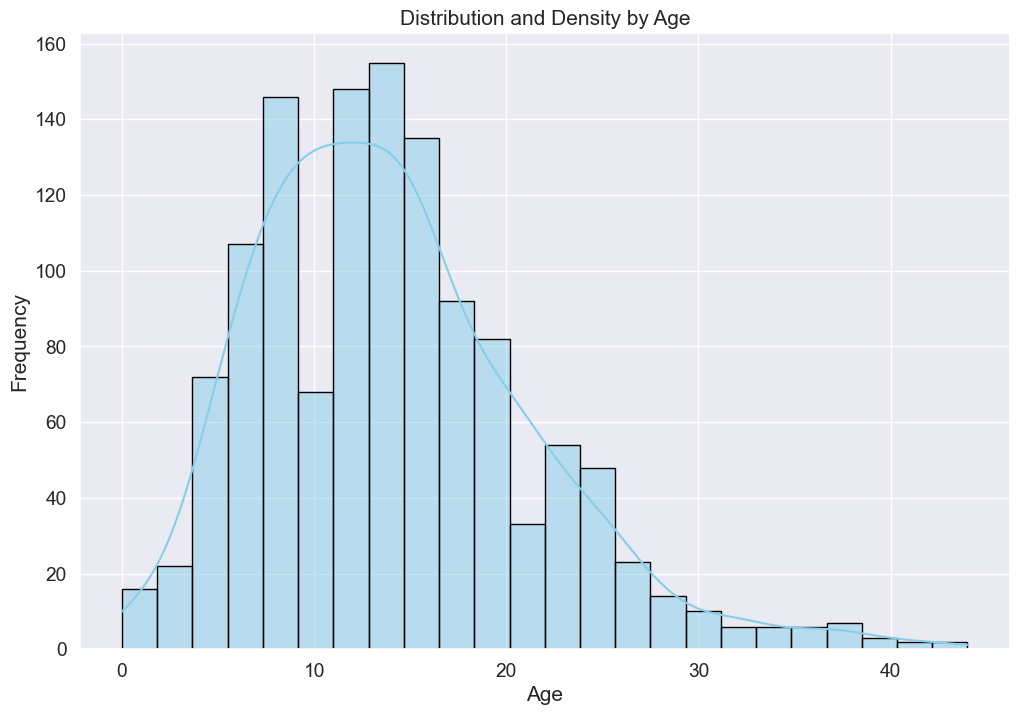

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.histplot(train_df["Age"], bins=24, kde=True, color="skyblue", edgecolor='black')

plt.title("Distribution and Density by Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


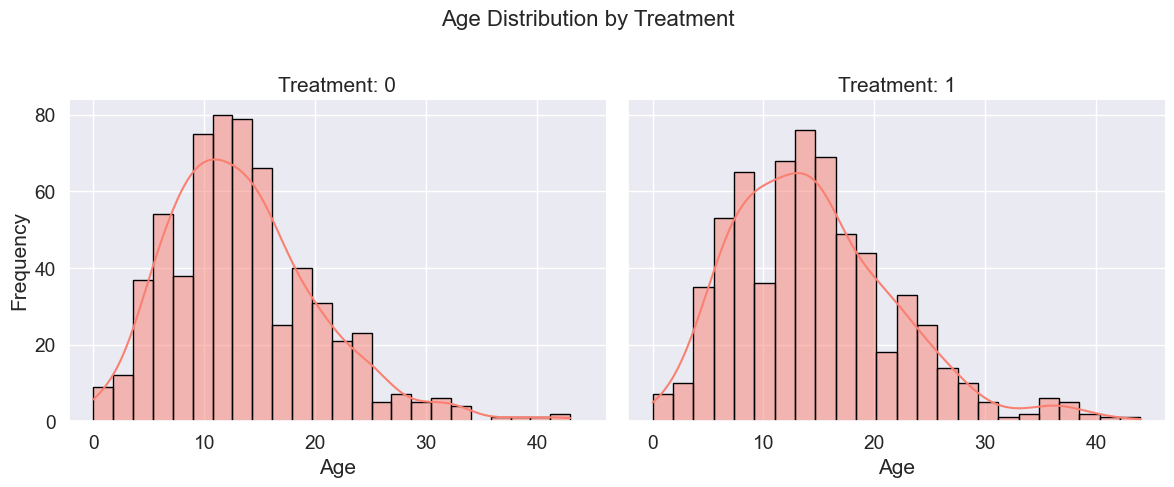

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create FacetGrid
g = sns.FacetGrid(train_df, col='treatment', height=5, aspect=1.2)
g.map(sns.histplot, "Age", bins=24, kde=True, color="salmon", edgecolor="black")

g.set_titles("Treatment: {col_name}")
g.set_axis_labels("Age", "Frequency")
plt.subplots_adjust(top=0.8)
g.fig.suptitle("Age Distribution by Treatment", fontsize=16)

plt.show()


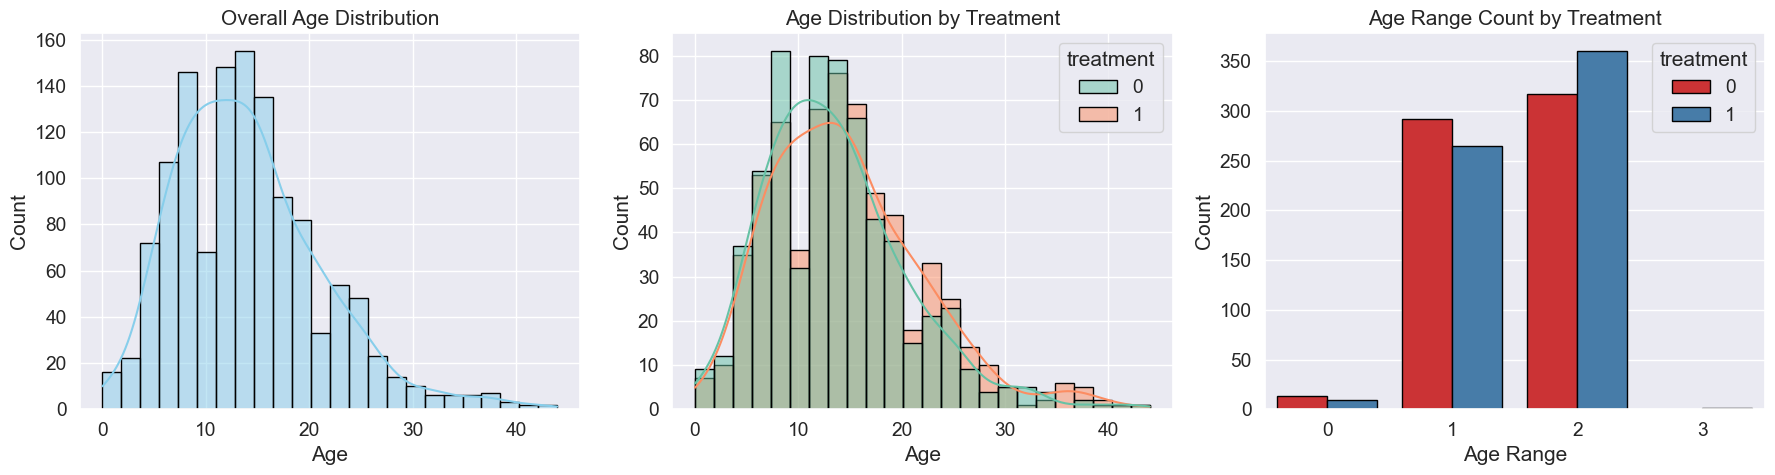

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 5))

# Plot 1: Overall Age distribution
plt.subplot(1, 3, 1)
sns.histplot(train_df["Age"], bins=24, kde=True, color="skyblue", edgecolor="black")
plt.title("Overall Age Distribution")
plt.xlabel("Age")

# Plot 2: Age distribution by Treatment
plt.subplot(1, 3, 2)
sns.histplot(data=train_df, x="Age", hue="treatment", bins=24, kde=True, palette="Set2", edgecolor="black")
plt.title("Age Distribution by Treatment")
plt.xlabel("Age")

# Plot 3: Age range count grouped by Treatment
plt.subplot(1, 3, 3)
sns.countplot(data=train_df, x="age_range", hue="treatment", palette="Set1", edgecolor="black")
plt.title("Age Range Count by Treatment")
plt.xlabel("Age Range")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


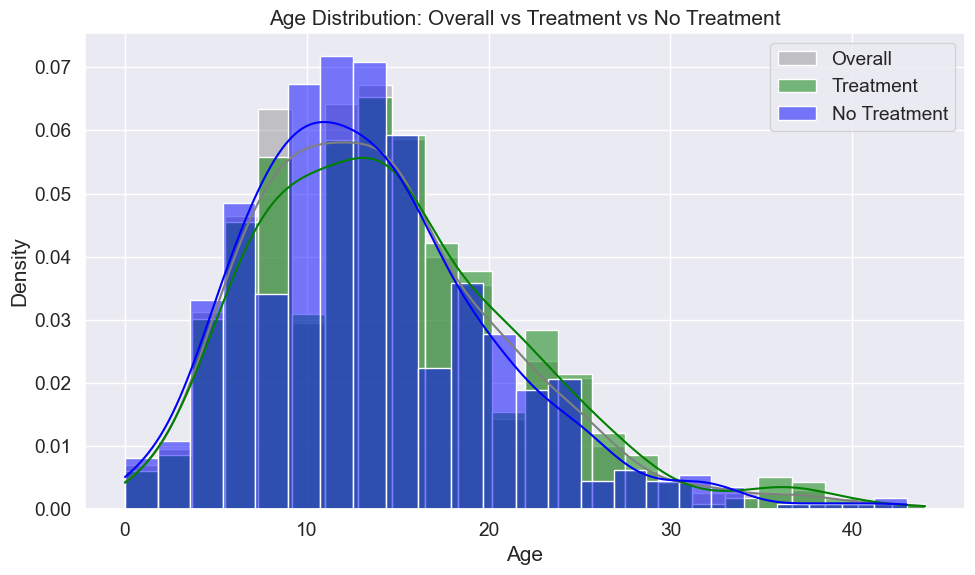

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Plot overall age distribution
sns.histplot(train_df["Age"], bins=24, kde=True, color="gray", label="Overall", stat="density", alpha=0.4)

# Plot age distribution for those who received treatment
sns.histplot(train_df[train_df["treatment"] == 1]["Age"], bins=24, kde=True, color="green", label="Treatment", stat="density", alpha=0.5)

# Plot age distribution for those who did not receive treatment
sns.histplot(train_df[train_df["treatment"] == 0]["Age"], bins=24, kde=True, color="blue", label="No Treatment", stat="density", alpha=0.5)

plt.title("Age Distribution: Overall vs Treatment vs No Treatment")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


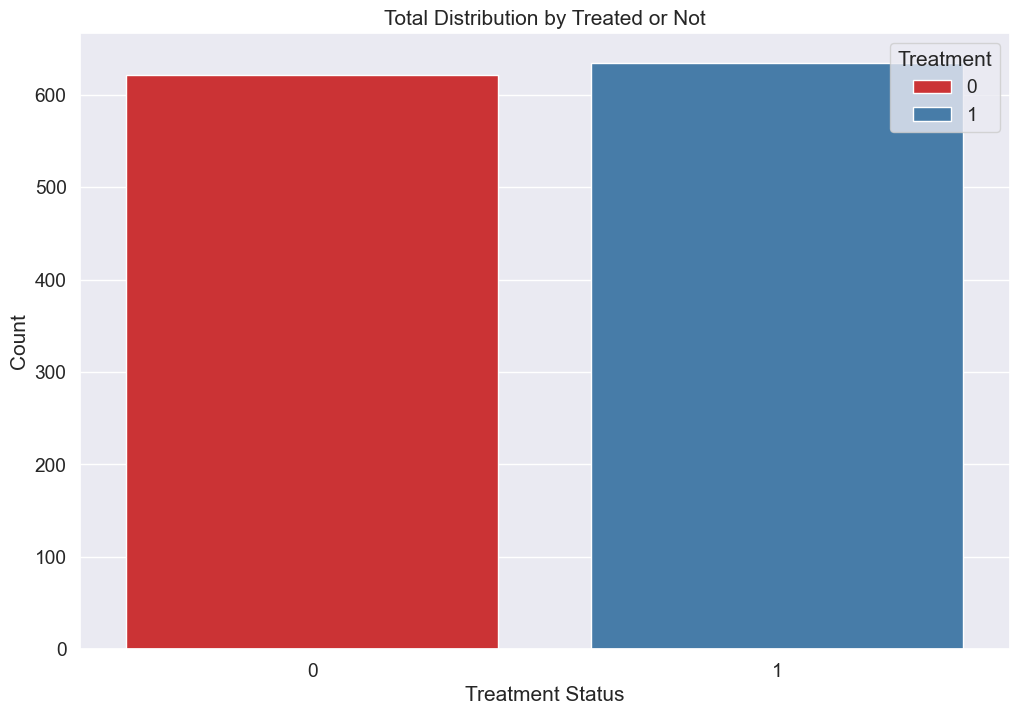

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

# Use Seaborn's default color palette with hue for proper coloring
sns.countplot(x="treatment", data=train_df, hue="treatment", palette="Set1", dodge=False)

plt.title('Total Distribution by Treated or Not')
plt.xlabel('Treatment Status')
plt.ylabel('Count')
plt.legend(title='Treatment', loc='upper right')
plt.show()


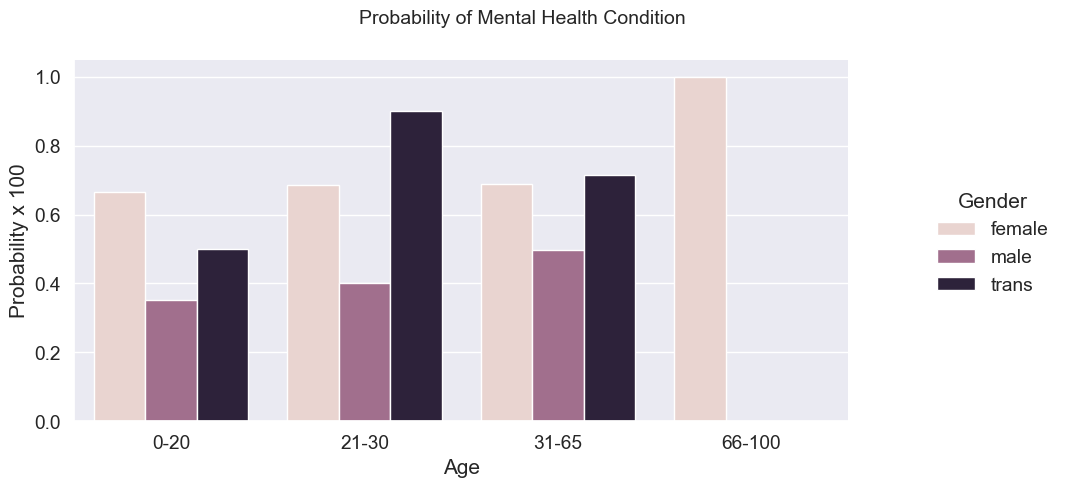

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correct label mapping
o = labelDict['label_age_range']
new_labels = labelDict['label_Gender']

# Updated catplot with errorbar=None instead of ci
g = sns.catplot(
    x="age_range", 
    y="treatment", 
    hue="Gender", 
    data=train_df, 
    kind="bar", 
    errorbar=None, 
    height=5, 
    aspect=2, 
    legend_out=True
)

# Set x-axis tick labels
g.set_xticklabels(o)

# Title and axis labels
g.fig.suptitle('Probability of Mental Health Condition', fontsize=14)
g.set_axis_labels("Age", "Probability x 100")

# Replace legend labels properly
for text, label in zip(g._legend.texts, new_labels):
    text.set_text(label)

# Adjust layout
g.fig.subplots_adjust(top=0.88, right=0.8)

plt.show()


<bound method FigureBase.subplots of <Figure size 1085.15x500 with 1 Axes>>

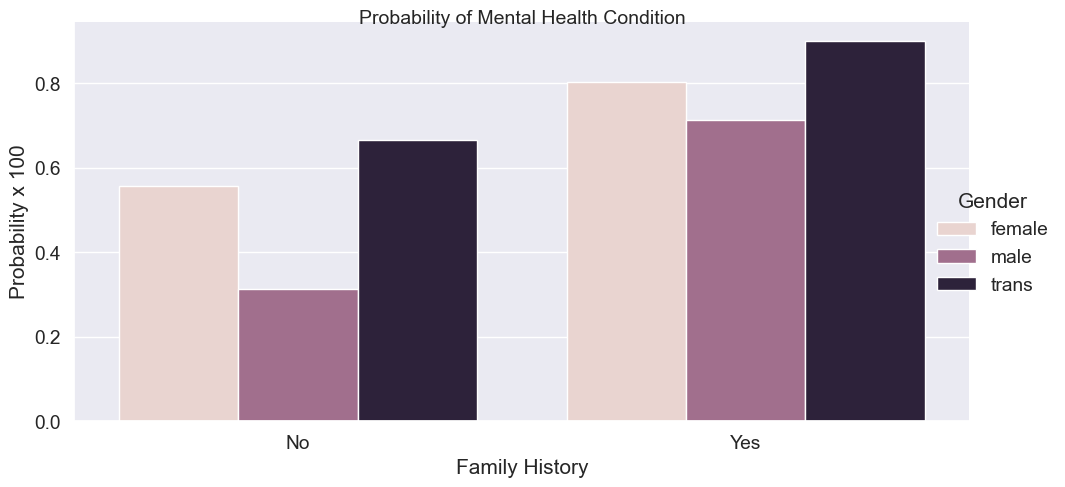

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get proper labels
o = labelDict['label_family_history']
new_labels = labelDict['label_Gender']

# Updated plot using catplot
g = sns.catplot(
    x="family_history", 
    y="treatment", 
    hue="Gender", 
    data=train_df, 
    kind="bar", 
    errorbar=None,     # Replaces ci=None
    height=5, 
    aspect=2, 
    legend_out=True
)

# Set proper x-axis tick labels
g.set_xticklabels(o)

# Set title and axis labels
g.fig.suptitle('Probability of Mental Health Condition', fontsize=14)
g.set_axis_labels("Family History", "Probability x 100")

# Replace legend labels
for text, label in zip(g._legend.texts, new_labels):
    text.set_text(label)

# Adjust layout
g.fig.subplots


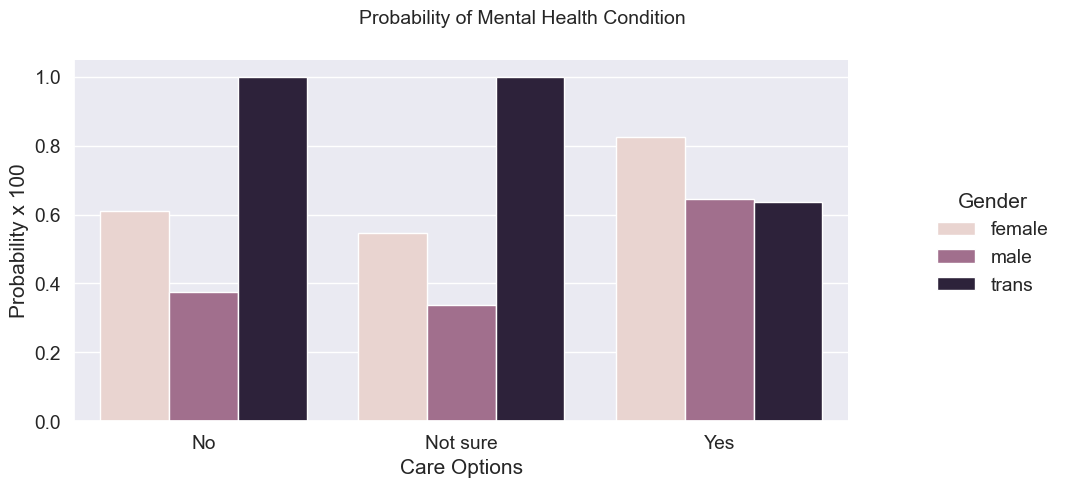

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get proper labels for the x-axis and legend
x_labels = labelDict['label_care_options']
legend_labels = labelDict['label_Gender']

# Create the bar plot using catplot
g = sns.catplot(
    x="care_options", 
    y="treatment", 
    hue="Gender", 
    data=train_df, 
    kind="bar", 
    errorbar=None,       # Replaces deprecated ci=None
    height=5, 
    aspect=2, 
    legend_out=True
)

# Set axis labels and title
g.set_axis_labels("Care Options", "Probability x 100")
g.set_xticklabels(x_labels)
g.fig.suptitle('Probability of Mental Health Condition', fontsize=14)

# Update legend text
for text, label in zip(g._legend.texts, legend_labels):
    text.set_text(label)

# Adjust layout
g.fig.subplots_adjust(top=0.88, right=0.8)

plt.show()


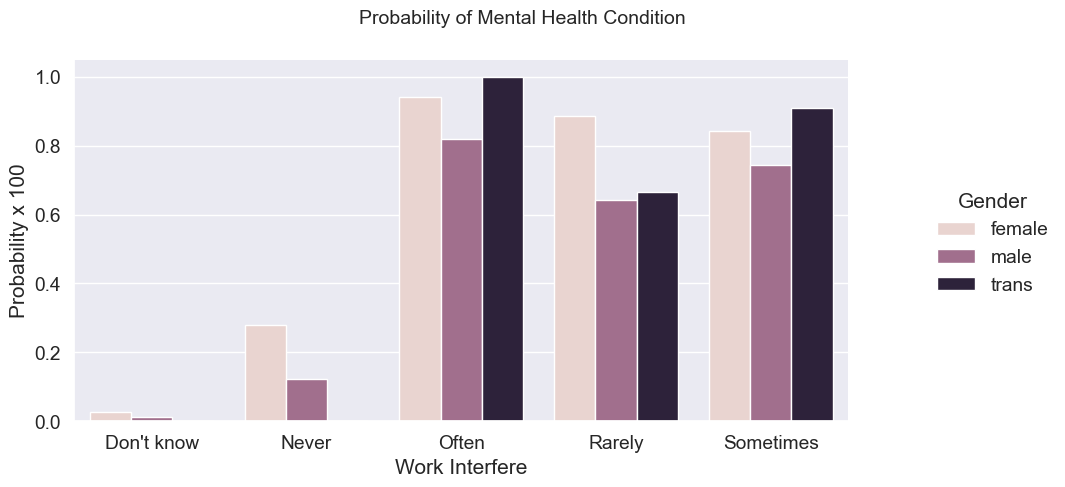

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get proper labels for the x-axis and legend
x_labels = labelDict['label_work_interfere']
legend_labels = labelDict['label_Gender']

# Create the bar plot using catplot
g = sns.catplot(
    x="work_interfere", 
    y="treatment", 
    hue="Gender", 
    data=train_df, 
    kind="bar", 
    errorbar=None,       # Modern replacement for ci=None
    height=5, 
    aspect=2, 
    legend_out=True
)

# Set axis labels and title
g.set_axis_labels("Work Interfere", "Probability x 100")
g.fig.suptitle('Probability of Mental Health Condition', fontsize=14)

# Set x-axis tick labels correctly
for ax in g.axes.flat:
    ax.set_xticks(range(len(x_labels)))
    ax.set_xticklabels(x_labels)

# Update legend text
for text, label in zip(g._legend.texts, legend_labels):
    text.set_text(label)

# Adjust layout
g.fig.subplots_adjust(top=0.88, right=0.8)

plt.show()


In [31]:
# Scaling Age
scaler = MinMaxScaler()
train_df['Age'] = scaler.fit_transform(train_df[['Age']])
train_df.head()

,Timestamp,Age,Gender,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,age_range
0,0,0.431818,0,10,0,0,1,2,4,0,...,1,1,1,2,1,0,2,0,158,2
1,1,0.590909,1,11,0,0,0,3,5,0,...,0,1,0,0,1,1,0,0,158,2
2,2,0.318182,1,45,0,0,0,3,4,0,...,1,1,2,2,2,2,1,0,158,2
3,3,0.295455,1,45,0,1,1,2,2,0,...,2,2,1,0,0,0,1,1,158,2
4,4,0.295455,1,37,0,0,0,1,1,1,...,1,1,1,2,2,2,0,0,158,2


In [32]:
# define X and y
feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
X = train_df[feature_cols]
y = train_df.treatment

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Create dictionaries for final graph
# Use: methodDict['Stacking'] = accuracy_score
methodDict = {}
rmseDict = ()

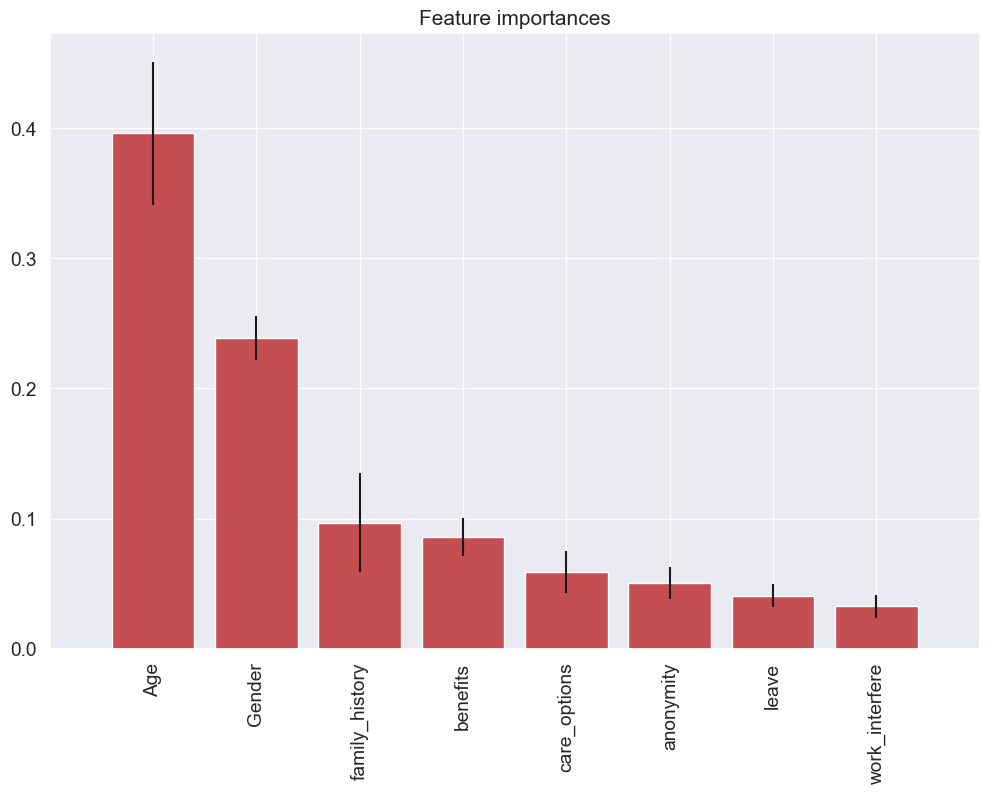

In [33]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

labels = []
for f in range(X.shape[1]):
    labels.append(feature_cols[f])      
    
# Plot the feature importances of the forest
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), labels, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

In [43]:
def evalClassModel(model, y_test, y_pred_class, plot=False):
    #Classification accuracy: percentage of correct predictions
    # calculate accuracy
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
    
    #Null accuracy: accuracy that could be achieved by always predicting the most frequent class
    # examine the class distribution of the testing set (using a Pandas Series method)
    print('Null accuracy:\n', y_test.value_counts())
    
    # calculate the percentage of ones
    print('Percentage of ones:', y_test.mean())
    
    # calculate the percentage of zeros
    print('Percentage of zeros:',1 - y_test.mean())
    
    #Comparing the true and predicted response values
    print('True:', y_test.values[0:25])
    print('Pred:', y_pred_class[0:25])
    
    #Confusion matrix
    # save confusion matrix and slice into four pieces
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    
    # visualize Confusion Matrix
    sns.heatmap(confusion,annot=True,fmt="d") 
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    #Metrics computed from a confusion matrix
    #Classification Accuracy: Overall, how often is the classifier correct?
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('Classification Accuracy:', accuracy)
    
    #Classification Error: Overall, how often is the classifier incorrect?
    print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_class))
    
    #False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
    false_positive_rate = FP / float(TN + FP)
    print('False Positive Rate:', false_positive_rate)
    
    #Precision: When a positive value is predicted, how often is the prediction correct?
    print('Precision:', metrics.precision_score(y_test, y_pred_class))
    
    
    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    print('AUC Score:', metrics.roc_auc_score(y_test, y_pred_class))
    
    # calculate cross-validated AUC
    print('Cross-validated AUC:', cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean())
    
    ##########################################
    #Adjusting the classification threshold
    ##########################################
    # print the first 10 predicted responses
    print('First 10 predicted responses:\n', model.predict(X_test)[0:10])

    # print the first 10 predicted probabilities of class membership
    print('First 10 predicted probabilities of class members:\n', model.predict_proba(X_test)[0:10])

    # print the first 10 predicted probabilities for class 1
    model.predict_proba(X_test)[0:10, 1]
    
    # store the predicted probabilities for class 1
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    if plot == True:
        # histogram of predicted probabilities
        plt.rcParams['font.size'] = 12
        plt.hist(y_pred_prob, bins=8)
        
        # x-axis limit from 0 to 1
        plt.xlim(0,1)
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of treatment')
        plt.ylabel('Frequency')
    
    
    # predict treatment if the predicted probability is greater than 0.3
    # it will return 1 for all values above 0.3 and 0 otherwise
    # results are 2D so we slice out the first column
    y_pred_prob = y_pred_prob.reshape(-1,1) 
    y_pred_class = binarize(y_pred_prob, threshold=0.3)[0]

    
    # print the first 10 predicted probabilities
    print('First 10 predicted probabilities:\n', y_pred_prob[0:10])
    
    ##########################################
    #ROC Curves and Area Under the Curve (AUC)
    ##########################################
    
    #AUC is the percentage of the ROC plot that is underneath the curve
    #Higher value = better classifier
    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
    
    

    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    # roc_curve returns 3 objects fpr, tpr, thresholds
    # fpr: false positive rate
    # tpr: true positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    if plot == True:
        plt.figure()
        
        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for treatment classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.show()
    
    # define a function that accepts a threshold and prints sensitivity and specificity
    def evaluate_threshold(threshold):
        #Sensitivity: When the actual value is positive, how often is the prediction correct?
        #Specificity: When the actual value is negative, how often is the prediction correct?print('Sensitivity for ' + str(threshold) + ' :', tpr[thresholds > threshold][-1])
        print('Specificity for ' + str(threshold) + ' :', 1 - fpr[thresholds > threshold][-1])

    # One way of setting threshold
    predict_mine = np.where(y_pred_prob > 0.50, 1, 0)
    confusion = metrics.confusion_matrix(y_test, predict_mine)
    print(confusion)
    
    
    
    return accuracy

In [44]:
def tuningCV(knn):
    
    # search for an optimal value of K for KNN
    k_range = list(range(1, 31))
    k_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
        k_scores.append(scores.mean())
    print(k_scores)
    # plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
    plt.plot(k_range, k_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()

In [45]:
def tuningGridSerach(knn):
    #More efficient parameter tuning using GridSearchCV
    k_range = list(range(1, 31))
    print(k_range)
    
    # create a parameter grid: map the parameter names to the values that should be searched
    param_grid = dict(n_neighbors=k_range)
    print(param_grid)
    
    # instantiate the grid
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

    # fit the grid with data
    grid.fit(X, y)
    
    # view the complete results (list of named tuples)
    grid.grid_scores_
    
    # examine the first tuple
    print(grid.grid_scores_[0].parameters)
    print(grid.grid_scores_[0].cv_validation_scores)
    print(grid.grid_scores_[0].mean_validation_score)
    
    # create a list of the mean scores only
    grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
    print(grid_mean_scores)
    
    # plot the results
    plt.plot(k_range, grid_mean_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()
    
    # examine the best model
    print('GridSearch best score', grid.best_score_)
    print('GridSearch best params', grid.best_params_)
    print('GridSearch best estimator', grid.best_estimator_)

In [46]:
def tuningRandomizedSearchCV(model, param_dist):
    #Searching multiple parameters simultaneously
    # n_iter controls the number of searches
    rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
    rand.fit(X, y)
    rand.cv_results_
    
    # examine the best model
    print('Rand. Best Score: ', rand.best_score_)
    print('Rand. Best Params: ', rand.best_params_)
    
    # run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
    best_scores = []
    for _ in range(20):
        rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10)
        rand.fit(X, y)
        best_scores.append(round(rand.best_score_, 3))
    print(best_scores)

In [47]:
def tuningMultParam(knn):
    
    #Searching multiple parameters simultaneously
    # define the parameter values that should be searched
    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']
        
    # create a parameter grid: map the parameter names to the values that should be searched
    param_grid = dict(n_neighbors=k_range, weights=weight_options)
    print(param_grid) 
    
    # instantiate and fit the grid
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
    grid.fit(X, y) 
    
    # view the complete results
    print(grid.grid_scores_)
    
    # examine the best model
    print('Multiparam. Best Score: ', grid.best_score_)
    print('Multiparam. Best Params: ', grid.best_params_)

In [48]:
def logisticRegression():
    # train a logistic regression model on the training set
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = logreg.predict(X_test)
    
    accuracy_score = evalClassModel(logreg, y_test, y_pred_class, True)
    
    #Data for final graph
    methodDict['Log. Regression'] = accuracy_score * 100

Accuracy: 0.7936507936507936
Null accuracy:
 treatment
0    191
1    187
Name: count, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0]


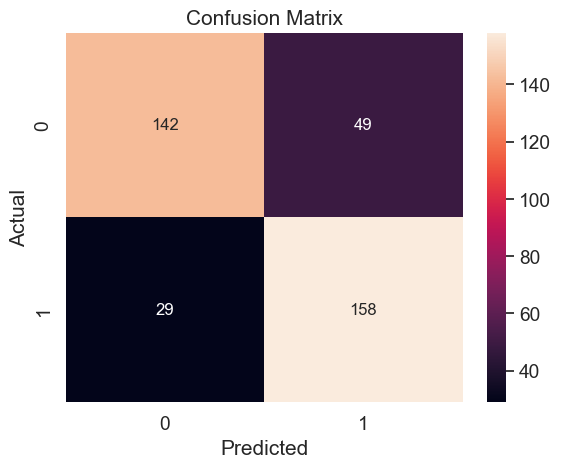

Classification Accuracy: 0.7936507936507936
Classification Error: 0.2063492063492064
False Positive Rate: 0.25654450261780104
Precision: 0.7632850241545893
AUC Score: 0.794187641739228
Cross-validated AUC: 0.8753371866593114
First 10 predicted responses:
 [1 0 0 0 1 1 0 1 0 1]
First 10 predicted probabilities of class members:
 [[0.09192784 0.90807216]
 [0.95998457 0.04001543]
 [0.96552072 0.03447928]
 [0.78739197 0.21260803]
 [0.38947126 0.61052874]
 [0.05256967 0.94743033]
 [0.75023269 0.24976731]
 [0.19037376 0.80962624]
 [0.61623206 0.38376794]
 [0.4769296  0.5230704 ]]
First 10 predicted probabilities:
 [[0.90807216]
 [0.04001543]
 [0.03447928]
 [0.21260803]
 [0.61052874]
 [0.94743033]
 [0.24976731]
 [0.80962624]
 [0.38376794]
 [0.5230704 ]]


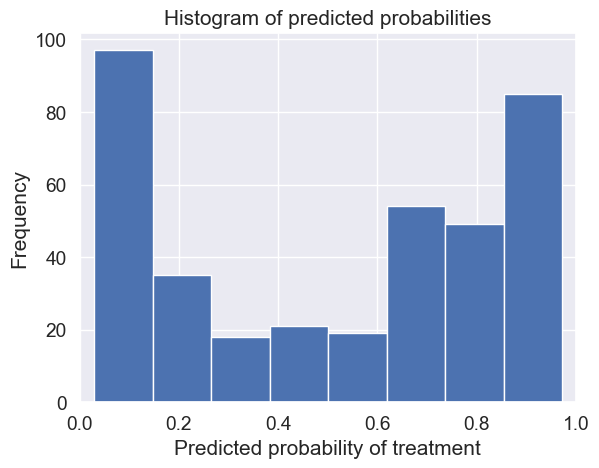

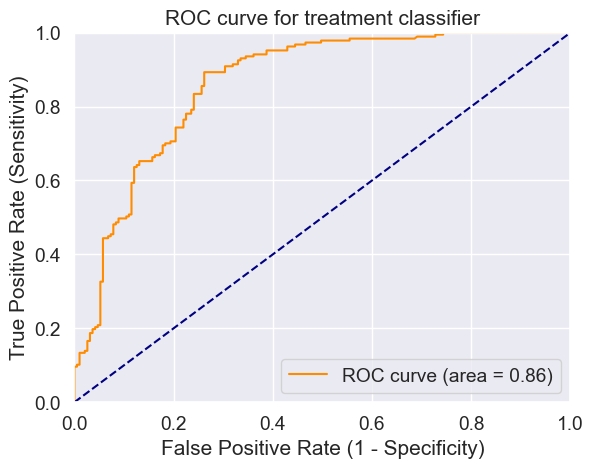

[[142  49]
 [ 29 158]]


In [49]:
logisticRegression()

In [50]:
def Knn():
    # Calculating the best parameters
    knn = KNeighborsClassifier(n_neighbors=5)
    
    # define the parameter values that should be searched
    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']
    
    # specify "parameter distributions" rather than a "parameter grid"
    param_dist = dict(n_neighbors=k_range, weights=weight_options)
    tuningRandomizedSearchCV(knn, param_dist)
    
    # train a KNeighborsClassifier model on the training set
    knn = KNeighborsClassifier(n_neighbors=27, weights='uniform')
    knn.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = knn.predict(X_test)
    
    accuracy_score = evalClassModel(knn, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['K-Neighbors'] = accuracy_score * 100

Rand. Best Score:  0.8217650793650794
Rand. Best Params:  {'weights': 'uniform', 'n_neighbors': 27}
[np.float64(0.819), np.float64(0.819), np.float64(0.822), np.float64(0.819), np.float64(0.819), np.float64(0.814), np.float64(0.819), np.float64(0.819), np.float64(0.819), np.float64(0.817), np.float64(0.817), np.float64(0.819), np.float64(0.815), np.float64(0.815), np.float64(0.822), np.float64(0.822), np.float64(0.822), np.float64(0.822), np.float64(0.819), np.float64(0.819)]
Accuracy: 0.8042328042328042
Null accuracy:
 treatment
0    191
1    187
Name: count, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0]


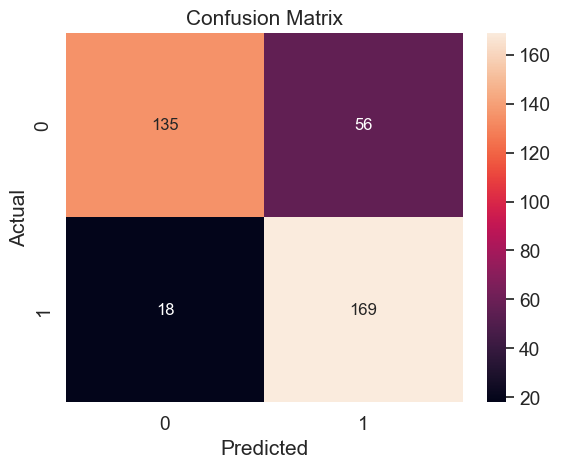

Classification Accuracy: 0.8042328042328042
Classification Error: 0.1957671957671958
False Positive Rate: 0.2931937172774869
Precision: 0.7511111111111111
AUC Score: 0.8052747991152673
Cross-validated AUC: 0.8784644661702792
First 10 predicted responses:
 [1 0 0 0 1 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.33333333 0.66666667]
 [1.         0.        ]
 [1.         0.        ]
 [0.66666667 0.33333333]
 [0.37037037 0.62962963]
 [0.03703704 0.96296296]
 [0.59259259 0.40740741]
 [0.37037037 0.62962963]
 [0.33333333 0.66666667]
 [0.33333333 0.66666667]]
First 10 predicted probabilities:
 [[0.66666667]
 [0.        ]
 [0.        ]
 [0.33333333]
 [0.62962963]
 [0.96296296]
 [0.40740741]
 [0.62962963]
 [0.66666667]
 [0.66666667]]


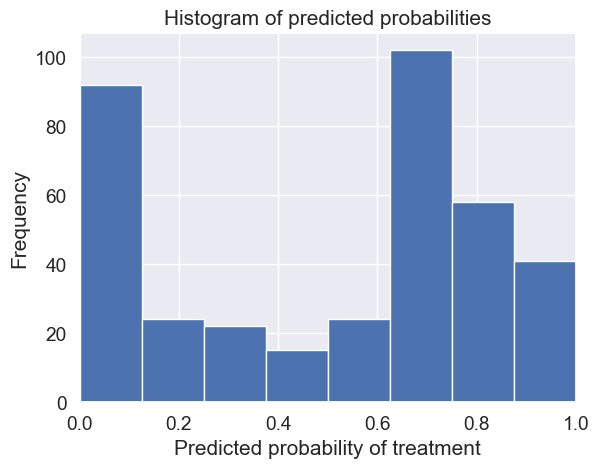

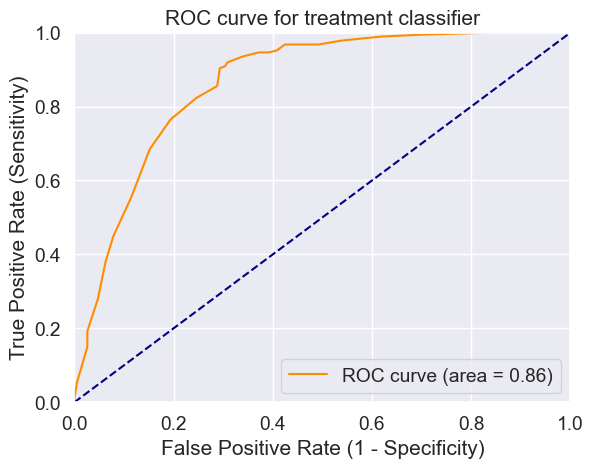

[[135  56]
 [ 18 169]]


In [51]:
Knn()

In [52]:
def treeClassifier():
    # Calculating the best parameters
    tree = DecisionTreeClassifier()
    featuresSize = feature_cols.__len__()
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    tuningRandomizedSearchCV(tree, param_dist)
    
    # train a decision tree model on the training set
    tree = DecisionTreeClassifier(max_depth=3, min_samples_split=8, max_features=6, criterion='entropy', min_samples_leaf=7)
    tree.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = tree.predict(X_test)
    
    accuracy_score = evalClassModel(tree, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['Decision Tree Classifier'] = accuracy_score * 100

Rand. Best Score:  0.8305206349206349
Rand. Best Params:  {'criterion': 'entropy', 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 6, 'min_samples_split': 4}
[np.float64(0.831), np.float64(0.828), np.float64(0.831), np.float64(0.831), np.float64(0.812), np.float64(0.831), np.float64(0.82), np.float64(0.831), np.float64(0.831), np.float64(0.831), np.float64(0.831), np.float64(0.823), np.float64(0.831), np.float64(0.82), np.float64(0.831), np.float64(0.817), np.float64(0.831), np.float64(0.831), np.float64(0.831), np.float64(0.829)]
Accuracy: 0.8068783068783069
Null accuracy:
 treatment
0    191
1    187
Name: count, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0]


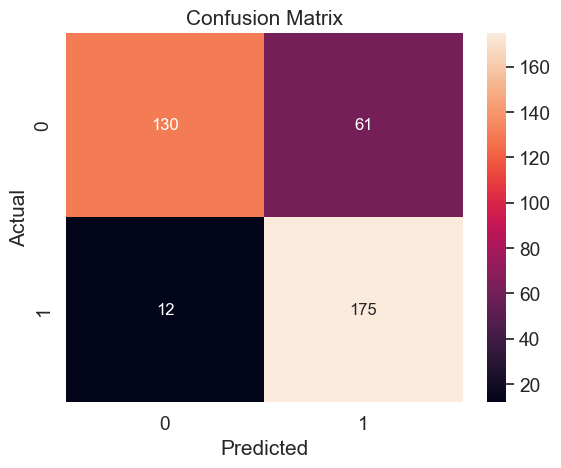

Classification Accuracy: 0.8068783068783069
Classification Error: 0.19312169312169314
False Positive Rate: 0.3193717277486911
Precision: 0.7415254237288136
AUC Score: 0.8082285746283282
Cross-validated AUC: 0.8819815039591106
First 10 predicted responses:
 [1 0 0 0 1 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.18       0.82      ]
 [0.97959184 0.02040816]
 [1.         0.        ]
 [0.8778626  0.1221374 ]
 [0.37583893 0.62416107]
 [0.18       0.82      ]
 [0.8778626  0.1221374 ]
 [0.37583893 0.62416107]
 [0.22018349 0.77981651]
 [0.22018349 0.77981651]]
First 10 predicted probabilities:
 [[0.82      ]
 [0.02040816]
 [0.        ]
 [0.1221374 ]
 [0.62416107]
 [0.82      ]
 [0.1221374 ]
 [0.62416107]
 [0.77981651]
 [0.77981651]]


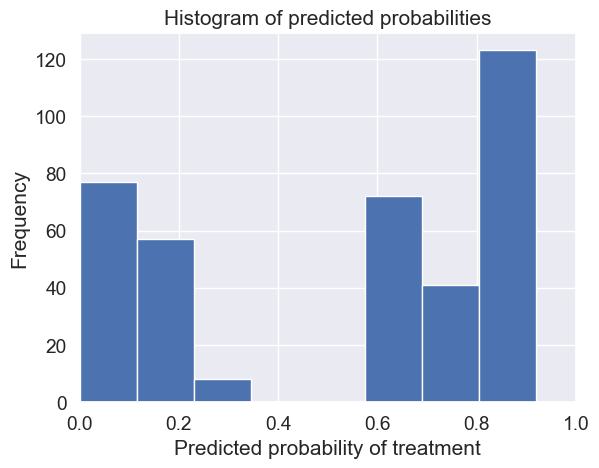

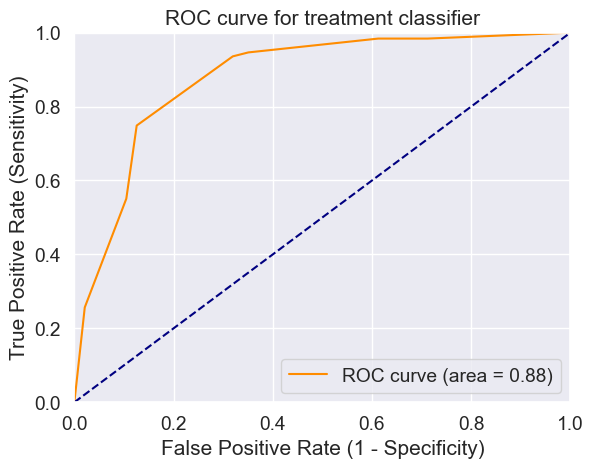

[[130  61]
 [ 12 175]]


In [54]:
treeClassifier()

In [55]:
def randomForest():
    # Calculating the best parameters
    forest = RandomForestClassifier(n_estimators = 20)

    featuresSize = feature_cols.__len__()
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    tuningRandomizedSearchCV(forest, param_dist)
    
    # Building and fitting my_forest
    forest = RandomForestClassifier(max_depth = None, min_samples_leaf=8, min_samples_split=2, n_estimators = 20, random_state = 1)
    my_forest = forest.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = my_forest.predict(X_test)
    
    accuracy_score = evalClassModel(my_forest, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['Random Forest'] = accuracy_score * 100

Rand. Best Score:  0.8305206349206349
Rand. Best Params:  {'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 7, 'min_samples_split': 8}
[np.float64(0.833), np.float64(0.831), np.float64(0.831), np.float64(0.832), np.float64(0.827), np.float64(0.831), np.float64(0.834), np.float64(0.831), np.float64(0.831), np.float64(0.831), np.float64(0.831), np.float64(0.831), np.float64(0.831), np.float64(0.831), np.float64(0.831), np.float64(0.834), np.float64(0.831), np.float64(0.831), np.float64(0.834), np.float64(0.831)]
Accuracy: 0.8121693121693122
Null accuracy:
 treatment
0    191
1    187
Name: count, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0]


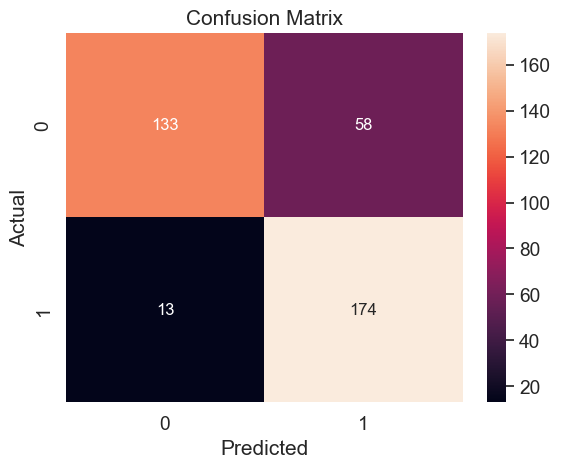

Classification Accuracy: 0.8121693121693122
Classification Error: 0.1878306878306878
False Positive Rate: 0.3036649214659686
Precision: 0.75
AUC Score: 0.8134081809782457
Cross-validated AUC: 0.8934280651104528
First 10 predicted responses:
 [1 0 0 0 1 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.2555794  0.7444206 ]
 [0.95069083 0.04930917]
 [0.93851009 0.06148991]
 [0.87096597 0.12903403]
 [0.40653554 0.59346446]
 [0.17282958 0.82717042]
 [0.89450448 0.10549552]
 [0.4065912  0.5934088 ]
 [0.20540631 0.79459369]
 [0.19337644 0.80662356]]
First 10 predicted probabilities:
 [[0.7444206 ]
 [0.04930917]
 [0.06148991]
 [0.12903403]
 [0.59346446]
 [0.82717042]
 [0.10549552]
 [0.5934088 ]
 [0.79459369]
 [0.80662356]]


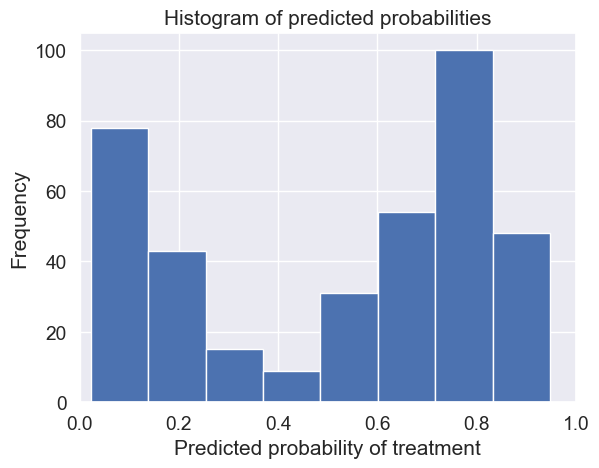

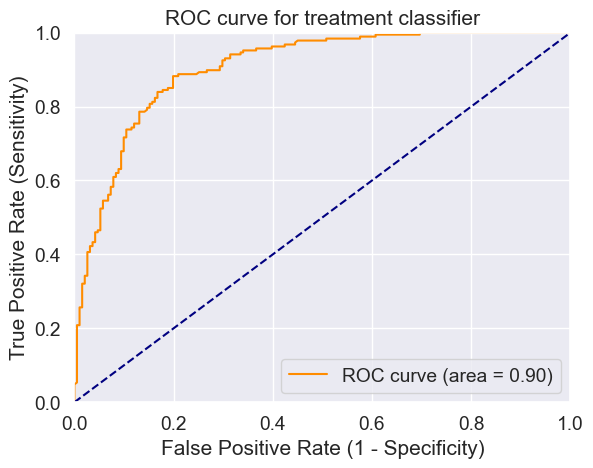

[[133  58]
 [ 13 174]]


In [56]:
randomForest()

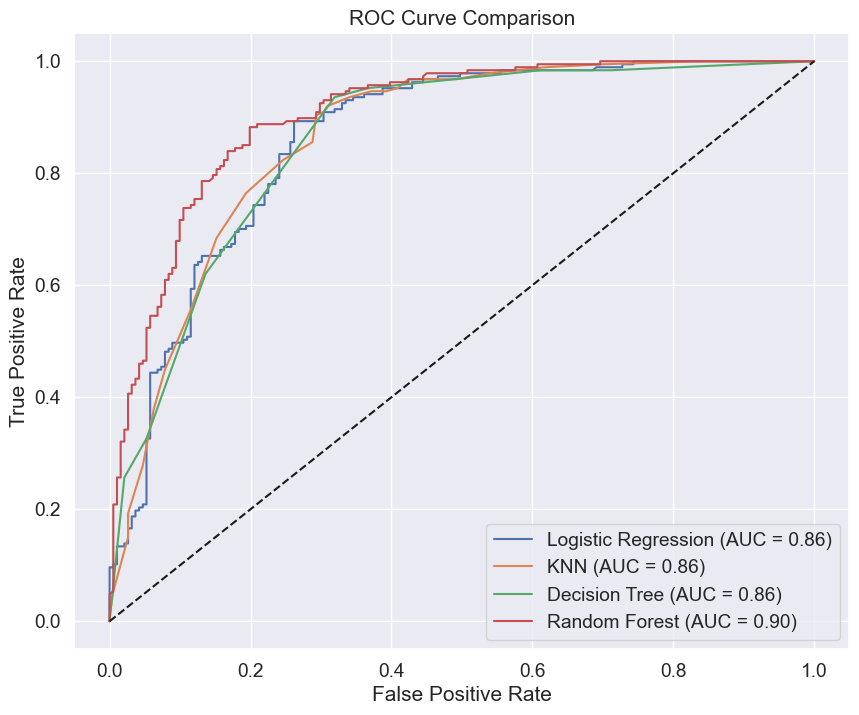

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import matplotlib.pyplot as plt

# Store ROC data for all models
roc_data = {}
methodDict = {}

# Logistic Regression
def logisticRegression():
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred_class = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    roc_data['Logistic Regression'] = (fpr, tpr, auc)
    methodDict['Logistic Regression'] = accuracy_score(y_test, y_pred_class) * 100

# K-Nearest Neighbors
def Knn():
    model = KNeighborsClassifier(n_neighbors=27, weights='uniform')
    model.fit(X_train, y_train)
    y_pred_class = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    roc_data['KNN'] = (fpr, tpr, auc)
    methodDict['KNN'] = accuracy_score(y_test, y_pred_class) * 100

# Decision Tree
def treeClassifier():
    model = DecisionTreeClassifier(max_depth=3, min_samples_split=8, max_features=6,
                                   criterion='entropy', min_samples_leaf=7)
    model.fit(X_train, y_train)
    y_pred_class = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    roc_data['Decision Tree'] = (fpr, tpr, auc)
    methodDict['Decision Tree'] = accuracy_score(y_test, y_pred_class) * 100

# Random Forest
def randomForest():
    model = RandomForestClassifier(max_depth=None, min_samples_leaf=8, min_samples_split=2,
                                   n_estimators=20, random_state=1)
    model.fit(X_train, y_train)
    y_pred_class = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    roc_data['Random Forest'] = (fpr, tpr, auc)
    methodDict['Random Forest'] = accuracy_score(y_test, y_pred_class) * 100

# Run all models
logisticRegression()
Knn()
treeClassifier()
randomForest()

# Plot ROC Curves
plt.figure(figsize=(10, 8))
for model_name, (fpr, tpr, auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()
